Задание №1:Вариант 11.

1) Подключение numpy и pandas.Пригодится :)

In [ ]:
import numpy as np
import pandas as pd

2)Запись основных функций и констант

In [ ]:
a=0.020
def f(x,t):
  return x+2*t-np.e**x+a*(12*x**2-2+t*np.e**x)
def mu(x):
  return -x**4+x**2
def mu_1(t):
  return t**2-t
def mu_2(t):
  return t**2+t-t*np.e
def u(t,x):
  return -x**4+x**2+t*x+t**2-t*np.e**x

3)Две функции:

 Прогонка - метод для решения линейных систем.

 Setka - подсчет значений на сетки с помощью метода Эйлера (неявного)

$\frac{u_{k}^{j+1}-u_{k}^{j}}{\tau}=a\frac{u_{k+1}^{j+1}-2u_{k}^{j+1}+u_{k-1}^{j+1}}{h^2}+f_{k}^{j+1}$


Задачу будем решать с помощью решение такой системы

$Au^{j}=\psi^{j}$

Отсюда следует, что матрица $A$ будет трехдиагональной, а
$a_{ij}=\frac{1}{\tau} + \frac{2a}{h^2}, b_{ij}=-\frac{a}{h^2}=c_{ij}$ диагональ, подиагональ и наддиагональ соответственно.


А правая часть так   $\psi_{k}^{j}=f_{k}^{j}+\frac{u_{k}^{j-1}}{\tau}$, где в соответствии с граничными условиями к началу вектора $\psi$ будет добавляться
$\frac{au_{0}^{j}}{h^2}$ , а к концу $\frac{au_{n+1}^{j}}{h^2}$.

In [ ]:
# метод Прогонки
def progonka(M,f):
   n=len(M)
   x,y=[],[]
   A,B=np.zeros((n,n)),np.zeros((n,n))
   #разбиение на две матрицы
   for i in range(n):
     B[i][i]=1
   A[0][0]=M[0][0]
   B[0][1]=M[0][1]/A[0][0]
   for i in range(1,n):
     A[i][i]=M[i][i]-M[i][i-1]*B[i-1][i]
     if i!=n-1:
       B[i][i+1]=M[i][i+1]/A[i][i]
     A[i][i-1]=M[i][i-1]
   x.append(f[0]/A[0][0])
   #построение каждой из них
   for i in range(1,n):
      x.append((f[i]-A[i][i-1]*x[i-1])/A[i][i])
   y.append(x[n-1])
   for i in range(n-2,-1,-1):
      y.append(x[i]-B[i][i+1]*y[n-i-2])
   return y[::-1]

def Setka(tau,h,a,f,mu,mu_1,mu_2):
  n_x=int(1/h)
  n_t=int(1/tau)
  A=np.zeros((n_x-1,n_x-1))
  for i in range(n_x-1):
    A[i][i]=1/tau+2*a/h**2
    if i!=(n_x-2):
       A[i+1][i]=-a/(h**2)
       A[i][i+1]=-a/(h**2)
  u_j=[mu(i/n_x) for i in range(0,n_x+1)]
  All_U=[u_j]
  for j in range(1,n_t+1):
    psi=[]
    U=[mu_1(j/n_t),mu_2(j/n_t)]
    for k in range(1,n_x):
      plchldr=f(k/n_x,(j-1/2)/n_t)+u_j[k]/tau +(k==1 or k==n_x-1)*U[(k==n_x-1)]*a/h**2  # прибавляем на концах (в первой строке и в последней, если в формализме матриц говорить)
      psi.append(plchldr)
    u_j=progonka(A,psi)
    u_j=[U[0]]+u_j+[U[1]]
    All_U.append(u_j)
  return All_U

4) Вывод  значений сетки(необязательно)

In [ ]:

for i in Setka(0.01,0.01,a,f,mu,mu_1,mu_2):
  print(i)

[0.0, 9.999000000000001e-05, 0.00039984, 0.00089919, 0.00159744, 0.0024937500000000003, 0.00358704, 0.004875990000000001, 0.006359040000000001, 0.008034389999999999, 0.009900000000000003, 0.01195359, 0.01419264, 0.016614390000000003, 0.01921584, 0.02199375, 0.02494464, 0.028064790000000006, 0.03135024, 0.03479679, 0.03840000000000001, 0.042155189999999995, 0.04605744, 0.05010159, 0.054282239999999995, 0.05859375, 0.06303024, 0.06758559, 0.07225344, 0.07702719, 0.0819, 0.08686479000000001, 0.09191424000000001, 0.09704079000000002, 0.10223664000000002, 0.10749374999999999, 0.11280383999999999, 0.11815839, 0.12354864, 0.12896559000000002, 0.13440000000000002, 0.13984238999999998, 0.14528303999999997, 0.15071199, 0.15611904, 0.16149375000000002, 0.16682544, 0.17210319, 0.17731584, 0.18245198999999998, 0.1875, 0.19244799, 0.19728384000000002, 0.20199519000000002, 0.20656944, 0.21099375000000004, 0.21525504, 0.21933998999999998, 0.22323504, 0.22692638999999998, 0.2304, 0.23364159, 0.23663664

5) Построение таблицы ошибок при разных $h$  и $\tau$.

In [ ]:
def norma(tau,h):
  U=Setka(tau,h,a,f,mu,mu_1,mu_2)
  maxx=-1000000000000
  for i in range(len(U)):
    for j in range(len(U[i])):
      error=abs(U[i][j]-u(i*tau,j*h))
      if error>maxx:
         maxx=error
  return maxx

b=[0.1,0.01,0.001]
A=[]
for j in b:
  B=[]
  for i in b:
     B.append(norma(i,j))
  A.append(B)

Errors=pd.DataFrame({"tau\h":["0.1","0.01","0.001"],"0.1":A[0],"0.01":A[1],"0.001":A[2]})
Errors

,tau\h,0.1,0.01,0.001
0,0.1,0.003455,0.002881,0.002875
1,0.01,0.000936,0.000298,0.000292
2,0.001,0.000688,0.000036,0.000029


6) Построение графика функции при конкретном $x=0.5$, при $\tau=0.001 , h=0.1$.

---



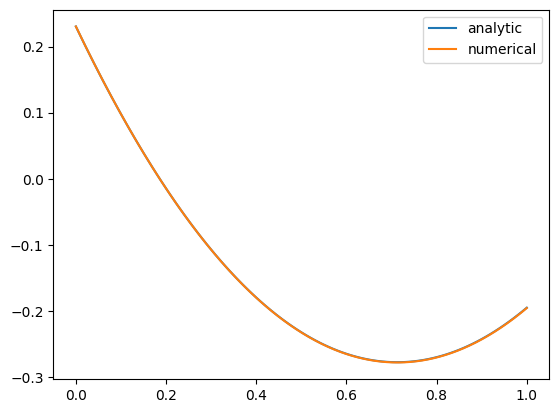

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot( [i/100 for i in range(100+1)],[u(i/100,0.5) for i in range(100+1)],label="analytic")
ax.plot([i/1000 for i in range(1000+1)],np.array(Setka(0.001,0.1,a,f,mu,mu_1,mu_2))[:,5],label="numerical")
ax.legend()

8) Построение 3-х мерного графика.

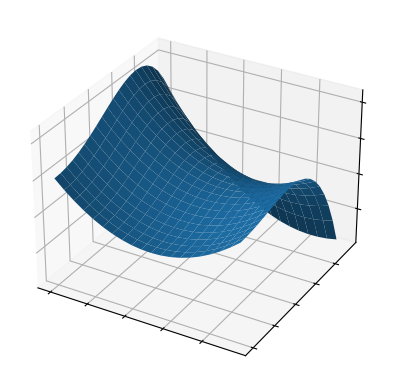

In [ ]:

X = np.arange(0, 1, 0.05)
T = np.arange(0, 1, 0.05)
X, T = np.meshgrid(X, T)
Z =u(X,T)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, T, Z, vmin=Z.min() * 2)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


Подготовил Куткин Лев. 21111